## Logistic Regression 

Importing important libraries and modules. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression

Defining the utility function called plot_confusion_matrix for displaying the confusion matrix in a nice UI.

In [2]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation ='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Defining the utility function called show_data for displaying precision, recall and accuracy from the confusion matrix.

In [3]:
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision    =  {:.5f}'.format(tp / (tp + fp)))
        print('Recall (TPR) =  {:.5f}'.format(tp / (tp + fn)))
        print('Accuracy     =  {:.5f}'.format((tp + tn) / (tp + tn + fp + fn)))
    return tp / (tp + fp), tp / (tp + fn), (tp + tn) / (tp + tn + fp + fn) 

Loading data from csv file to the dataframe. Extracting fraud records from it. 

In [15]:
df = pd.read_csv('https://people.rit.edu/~hvp4259/project/data/creditcard.csv')
fraud = df[df['Class'].isin([1])]
X_fraud = fraud[fraud.columns[0:30]]
Y_fraud = fraud[fraud.columns[30]]
print(X_fraud.shape)
print(Y_fraud.shape)

(492, 30)
(492,)


Examining the shape of the dataframe in order to check if all the instances are loaded correctly or not. 

In [5]:
df.shape

(284807, 31)

Splitting the data between test and training data. Also checking the shape for trainign features and test features. 

In [6]:
X, Xt, Y, Yt = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.10, random_state=10)

In [7]:
X.shape

(256326, 30)

In [8]:
Xt.shape

(28481, 30)

Training the model and applying logistic regression with constatnt of regulization being 0.01 and penatly norms being l2. 

In [9]:
model = LogisticRegression(C = 0.01, penalty = 'l2')
model.fit(X, Y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Applying the model on test data and ploting the congusion matrix. 

[[255781    101]
 [   171    273]]


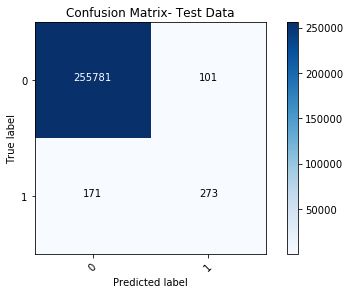

Precision    =  0.72995
Recall (TPR) =  0.61486
Accuracy     =  0.99894


In [10]:
y_pred = model.predict(X)
cm = confusion_matrix(Y, y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Test Data')
pr, tpr, acc = show_data(cm, print_res = 1);

Applying the model on fraud data only and ploting the congusion matrix. 

[[  0   0]
 [185 307]]


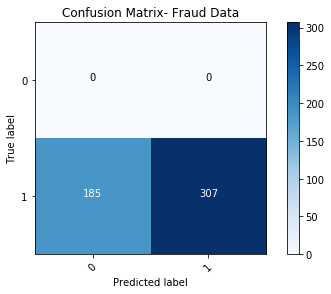

Precision    =  1.00000
Recall (TPR) =  0.62398
Accuracy     =  0.62398


In [11]:
y_pred = model.predict(X_fraud)
cm = confusion_matrix(Y_fraud, y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Fraud Data')
pr, tpr, acc = show_data(cm, print_res = 1);

Applying the model on entire dataset and plotting the confusion matrix. 

[[284203    112]
 [   185    307]]


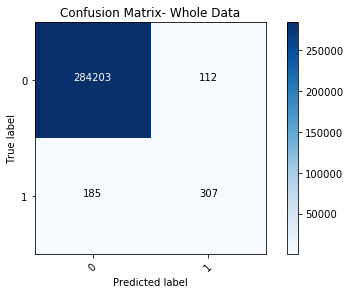

Precision    =  0.73270
Recall (TPR) =  0.62398
Accuracy     =  0.99896


In [12]:
y_pred = model.predict(df[df.columns[0:30]])
cm = confusion_matrix(df[df.columns[30]], y_pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Whole Data')
pr, tpr, acc = show_data(cm, print_res = 1);